# Markowitz Portfolio Optimization for NIFTY 50 Stocks

The modern portfolio theory (MPT) is a practical method for selecting investments in order to maximize their overall returns within an acceptable level of risk.
A key component of the MPT theory is diversification. Most investments are either high risk and high return or low risk and low return. American economist Harry Markowitz who pioneered this theory, argued that investors could achieve their best results by choosing an optimal mix of the two based on an assessment of their individual tolerance to risk.

## Assumptions:
- Investors attempt to maximize returns given their unique situation
- Asset returns are normally distributed
- Investors are rational and avoid unnecessary risk
- All investors have access to the same information
- Investors have the same views on expected returns
- Taxes and trading costs are not considered
- Single investors are not sizable enough to influence market prices
- Risk free rate is assumed to be 5%
- Shorting securities is not allowed

### Library Imports

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy.optimize import minimize

### Equity Data

#### NIFTY 50 Constituents

In [2]:
components = ['ADANIPORTS.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBIN.NS', 'SBILIFE.NS', 'SHREECEM.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TCS.NS', 'TATACONSUM.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS']
rf = 0.05
n = len(components)

#### Constituents' Closing Prices

In [3]:
# Closing Price Data
closeData = pd.DataFrame()
o = 1
for component in components:
    closeData[component] = yf.download(component, start = dt.date(2021,1,1), end = dt.date(2022,1,1), progress = False)['Adj Close']
    print(o, end = " ")
    o += 1
# closeData    

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

### Calculating Returns and Variance-Covariance Matrix

In [4]:
returnData = closeData.pct_change()
returnData = returnData.drop(returnData.iloc[0].name)
# returnData

# Annualized Returns
annReturns = pd.DataFrame(index = [0])
for i in components:
    k = returnData.loc[:,i].mean()
    annReturns[i] = (1+k)**252 - 1
# annReturns

# Annualized Variance-Covariance Matrix
annVariance = returnData.cov() * 252
# annVariance

# Returns and Variance-Covariance Matrix as numpy arrays
ret = annReturns.to_numpy().reshape((n,1))
var = annVariance.to_numpy()

### Functions

In [5]:
# Generating Random Weights
def weights(n):
    # n is number of components
    w = np.random.random((n,1))
    w /= np.sum(w)
    return w

# Calculating Portfolio Return
def pret(w):
    pret = w.T @ ret
    pret = pret.sum()
    return pret

# Calculating Portfolio Risk
def prisk(w):
    prisk = np.sqrt(((w.T @ var) @ w).sum())
    return prisk

# Checking Sum of Weights to be One
def checkSumToOne(w):
    return np.sum(w)-1

# Calculating Negative Sharpe Ratio
def negSharpe(w):
    return -1*((pret(w)-rf)/prisk(w))

## Optimizing Weights

In [6]:
# Random Weights
w0 = weights(len(components))

# Weights' Bounds
bounds = []
for i in components:
    bounds.append((0,1))
bounds = tuple(bounds)

# Problem Constraints
constraints = ({'type':'eq', 'fun':checkSumToOne})

### Minimum Variance Portfolio

In [7]:
# Minimum Variance Portfolio
w_minvar = minimize(prisk,w0,method = 'SLSQP', bounds = bounds, constraints = constraints)
minvarweights = w_minvar.x
print(minvarweights.round(4))
print()
print()
print("Expected Risk:", prisk(minvarweights), "Expected Return:", pret(minvarweights))

[0.     0.     0.     0.     0.0594 0.     0.     0.0408 0.0373 0.1823
 0.1071 0.     0.0306 0.0446 0.     0.     0.     0.     0.0565 0.059
 0.     0.     0.0567 0.009  0.     0.0525 0.0124 0.     0.     0.0126
 0.     0.005  0.1189 0.     0.     0.0228 0.0078 0.     0.0846 0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]


Expected Risk: 0.1089155376373992 Expected Return: 0.16576085424026096


### Maximum Sharpe Ratio Portfolio

In [8]:
# Max Sharpe Ratio Portfolio
w_maxsharpe = minimize(negSharpe,w0,method = 'SLSQP', bounds = bounds, constraints = constraints)
maxsharpeweights = w_maxsharpe.x
print(maxsharpeweights.round(4))
print()
print()
print("Expected Risk:", prisk(maxsharpeweights), "Expected Return:", pret(maxsharpeweights))

[0.     0.1993 0.     0.     0.     0.     0.0986 0.     0.     0.
 0.     0.     0.     0.     0.     0.1094 0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.0183 0.     0.     0.     0.     0.
 0.     0.1752 0.     0.     0.     0.2059 0.     0.     0.0499 0.1433]


Expected Risk: 0.21542080314375933 Expected Return: 1.182265113480344


In [12]:
# Results DataFrame

stocks = pd.DataFrame({"Stock":components, "Min Var":100*minvarweights.round(4), "Max Sharpe": 100*maxsharpeweights.round(4)})
# stocks.loc[(stocks["Min Var"] != 0) | (stocks["Max Sharpe"] != 0)]

## Plots

### Minimum Variance Portfolio

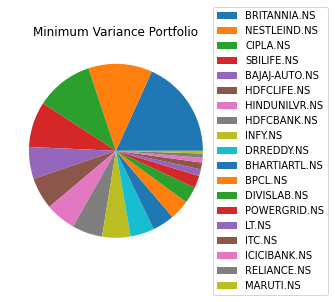

In [13]:
plt.rcParams['figure.figsize'] = [6, 4]
temp_df = stocks[stocks['Min Var'] > 0].sort_values('Min Var', ascending = False)
temp_df
plt.pie(temp_df['Min Var'], labels = temp_df['Stock'], labeldistance = None)
plt.legend(bbox_to_anchor=(1.5,0.5), loc="center right")
plt.title("Minimum Variance Portfolio")
plt.show()

### Maximum Sharpe-Ratio Portfolio

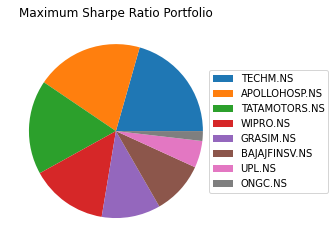

In [14]:
plt.rcParams['figure.figsize'] = [6, 4]
temp_df = stocks[stocks['Max Sharpe'] > 0].sort_values('Max Sharpe', ascending = False)
temp_df
plt.pie(temp_df['Max Sharpe'], labels = temp_df['Stock'], labeldistance = None)
plt.legend(bbox_to_anchor=(1.5,0.5), loc="center right")
plt.title("Maximum Sharpe Ratio Portfolio")
plt.show()

## Monte Carlo Simulation Method
#### Works well only for a few securities (5 to 10)

In [15]:
tickers = list(np.random.choice(components, 5))
epochs = 10000
ef = pd.DataFrame(columns = ['Return', 'Risk', 'Sharpe'] + tickers, index = range(epochs))
n = len(tickers)
for i in range(0, epochs+1):
    if i%1000 == 0:
        print(i, "iterations run.")
    w = weights(n)
    ef.loc[i,"Return"] = (w.T @ annReturns.loc[:, tickers].to_numpy().reshape((len(tickers), 1))).sum()
    ef.loc[i,"Risk"] = np.sqrt(((w.T @ (returnData.loc[:, tickers].cov()*252).to_numpy()) @ w).sum())
    ef.loc[i,"Sharpe"] = (ef.loc[i,"Return"] - rf)/ef.loc[i,"Risk"]
    ef.iloc[i,3:] = w.flatten()
# ef

0 iterations run.
1000 iterations run.
2000 iterations run.
3000 iterations run.
4000 iterations run.
5000 iterations run.
6000 iterations run.
7000 iterations run.
8000 iterations run.
9000 iterations run.
10000 iterations run.


### Plot of All Possible Portfolios

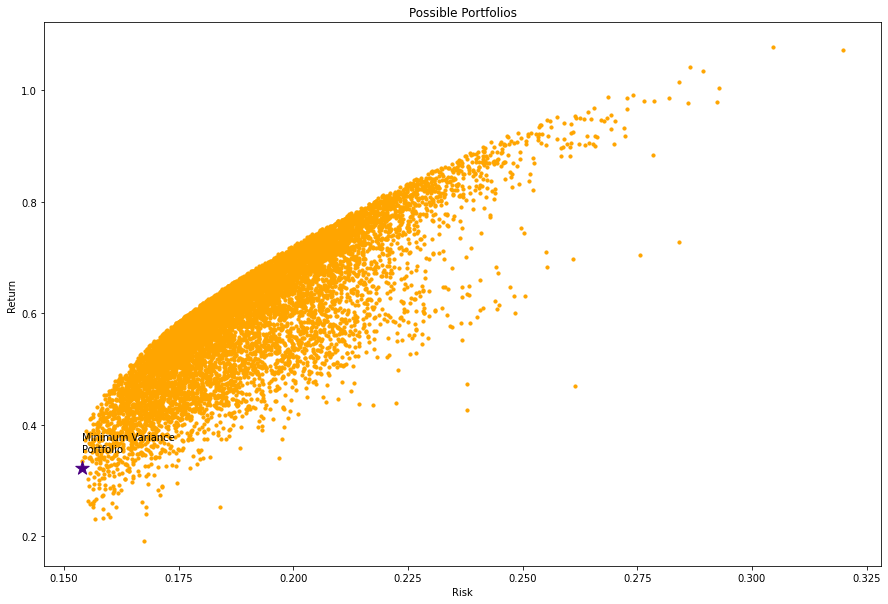

In [16]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.scatter(x = ef['Risk'], y = ef['Return'], color = 'orange', s = 10)
min_var_ef = ef[ef['Risk'] == ef['Risk'].min()]
plt.scatter(x = min_var_ef['Risk'], y = min_var_ef['Return'], color = 'indigo', s = 200, marker = '*')
plt.text(x = min_var_ef['Risk'], y = min_var_ef['Return']+0.03, s = 'Minimum Variance\nPortfolio', ha = 'left')
plt.title('Possible Portfolios')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.show()

# Fin.